# 1.4 Friend recommendation in personalized networks

In [8]:
library('igraph')

In [32]:
# genenrate the fb graph
FB <- read_graph("facebook_combined.txt",format="edgelist",directed=FALSE)

In [33]:
# personalized network of node with ID 415
FB_neighbor = neighbors(FB, 415, mode = "total")

## 1.4.2 Friend recommendation using neighborhood based measures

In [4]:
# neighbor of each nodes that is not the neighbor of ID415,
# Calculate their Jaccard
Jaccard = c()
for (node in 1:vcount(FB)){
    if (node %in% FB_neighbor){
        Jaccard = append(Jaccard, 0)
    }
    if (node == 415){
        Jaccard = append(Jaccard, 0)
    }
    node_neighbor = neighbors(FB, node, mode = "total")
    numerator = length(intersect(node_neighbor,FB_neighbor))
    denominator = length(union(node_neighbor,FB_neighbor))
    Jaccard = append(Jaccard, numerator / denominator)
}

In [5]:
# find t biggest , suppose t = 5
sortingJac = sort(Jaccard, decreasing=TRUE, index.return=TRUE)
print(sortingJac$ix[1:5])

[1] 431 658 381 460 660


## 1.4.3 Creating the list of users

 [1]  31  53  75  90  93 102 118 133 134 136 137


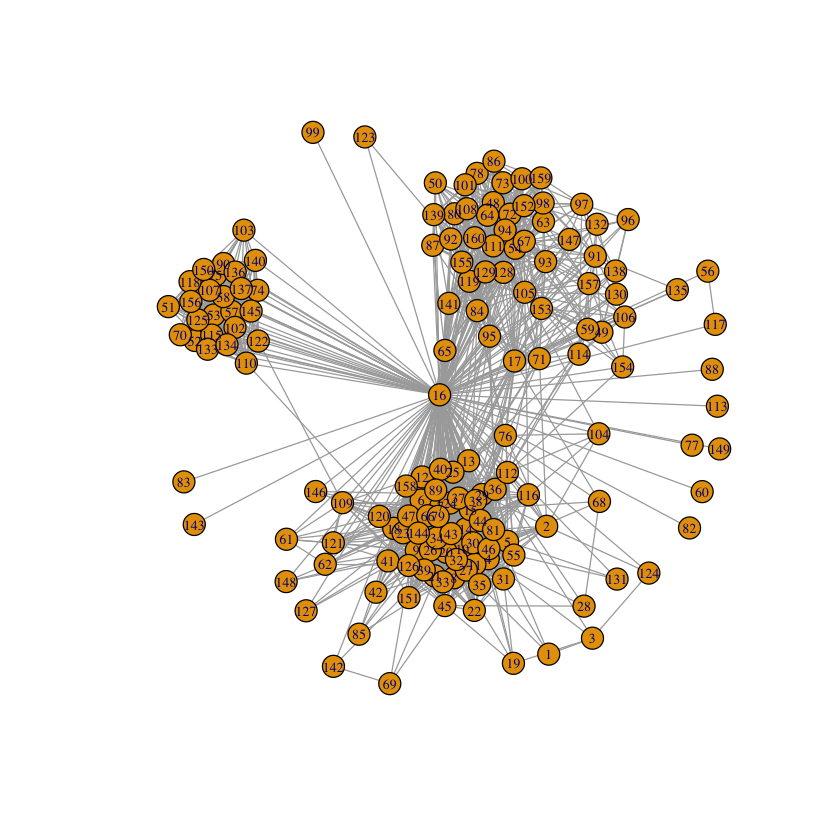

In [19]:
# Creat Nr
Nr = c()
FB_id = induced_subgraph(FB, c(415,FB_neighbor), impl ="auto")
plot(FB_id, vertex.size=8, vertex.label.cex=0.7)

for (node in 1:vcount(FB_id)){
    if (degree(FB_id, node) == 24){
        Nr = append(Nr, node)
    }
}
print(Nr)


## 1.4.4 Average accuracy of friend recommendation algorithm

In [20]:
# function of Jaccard
func_Jaccard = function (FB_id, FB_neighbor, size, thisnode){
    Jaccard = c()
    for (node in 1:vcount(FB_id)){
        if (node %in% FB_neighbor){
            Jaccard = append(Jaccard, 0)
        }
        if (node == thisnode){
            Jaccard = append(Jaccard, 0)
        }
        node_neighbor = neighbors(FB_id, node, mode = "total")
        numerator = length(intersect(node_neighbor,FB_neighbor))
        denominator = length(union(node_neighbor,FB_neighbor))
        Jaccard = append(Jaccard, numerator / denominator)
    }
    sortingJac = sort(Jaccard, decreasing=TRUE, index.return=TRUE)
    return (sortingJac$ix[1:size])
}

In [39]:
#test
func_Jaccard(FB, FB_neighbor, size = 5, thisnode = 415)

[1] 431 658 381 460 660

In [40]:
# function of commonNeighbor
commonNeighbor = function (FB_id, FB_neighbor, size, thisnode){
    commonNeighbor = c()
    for (node in 1:vcount(FB_id)){
        if (node %in% FB_neighbor){
            commonNeighbor = append(commonNeighbor, 0)
        }
        if (node == thisnode){
            commonNeighbor = append(commonNeighbor, 0)
        }
        node_neighbor = neighbors(FB_id, node, mode = "total")
        numerator = length(intersect(node_neighbor,FB_neighbor))
        commonNeighbor = append(commonNeighbor, numerator)
    }
    sortingcom = sort(commonNeighbor, decreasing=TRUE, index.return=TRUE)
    return (sortingcom$ix[1:size])
}

In [41]:
#test
commonNeighbor(FB, FB_neighbor, size = 5, thisnode = 415)

[1] 431 386 381 548 449

In [49]:
# function of Adamic_Adar
Adamic_Adar = function (FB_id, FB_neighbor, size, thisnode){
    Adamic_Adar = c()
    for (node in 1:vcount(FB_id)){
        if (node %in% FB_neighbor){
            Adamic_Adar = append(Adamic_Adar, 0)
        }
        if (node == thisnode){
            Adamic_Adar = append(Adamic_Adar, 0)
        }
        node_neighbor = neighbors(FB_id, node, mode = "total")
        numerator = intersect(node_neighbor,FB_neighbor)
        count = 0
        for (num in numerator){
            num_neighbor = neighbors(FB_id, num, mode = "total")
            number = log(length(num_neighbor))
            count = count + number
        }
        Adamic_Adar = append(Adamic_Adar, count)
    }
    sortingAA = sort(Adamic_Adar, decreasing=TRUE, index.return=TRUE)
    return (sortingAA$ix[1:size])
}

In [50]:
#test
Adamic_Adar(FB, FB_neighbor, size = 5, thisnode = 415)

[1] 431 386 381 548 513

In [43]:
# Jaccard Method
Result_Jaccard = c()
for (i in Nr){
    Acc = 0
    for (iterate in 1:10){
        FB_id = induced_subgraph(FB, c(415,FB_neighbor), impl ="auto")
        Ri = c()
        user_neighbor = neighbors(FB_id, i, mode = "total")
        user_neighbor = sort(user_neighbor, decreasing=TRUE, index.return=FALSE)
        for (neighbor in user_neighbor){
            # Step1: 0.25 probability to remove the neighbor of the i user and put it into Ri
            if (runif(1, 0, 1) <= 0.25){
                Ri = append(Ri, neighbor)
                FB_id = delete_edges(FB_id, c(i, neighbor))
            }
        }
        # Step2 Use measures to recommend |Ri| new friends to the user i
        user_neighbor = neighbors(FB_id, i, mode = "total")
        Pi = func_Jaccard(FB_id, user_neighbor, size = length(Ri), thisnode = i)
        # Step 3 Calculate Accuracy
        Acc = Acc + length(intersect(Pi, Ri)) / length(Ri)
    }
    Acc = Acc / 10
    Result_Jaccard = append(Result_Jaccard, Acc)
} 
print(Result_Jaccard)

 [1] 0.06785714 0.02575758 0.14857143 0.02678571 0.10829365 0.03250000
 [7] 0.11651515 0.04361111 0.06595238 0.08888889 0.01000000


In [51]:
# commonNeighbor Method
Result_commom = c()
for (i in Nr){
    Acc = 0
    for (iterate in 1:10){
        FB_id = induced_subgraph(FB, c(415,FB_neighbor), impl ="auto")
        Ri = c()
        user_neighbor = neighbors(FB_id, i, mode = "total")
        user_neighbor = sort(user_neighbor, decreasing=TRUE, index.return=FALSE)
        for (neighbor in user_neighbor){
            # Step1: 0.25 probability to remove the neighbor of the i user and put it into Ri
            if (runif(1, 0, 1) <= 0.25){
                Ri = append(Ri, neighbor)
                FB_id = delete_edges(FB_id, c(i, neighbor))
            }
        }
        # Step2 Use measures to recommend |Ri| new friends to the user i
        user_neighbor = neighbors(FB_id, i, mode = "total")
        Pi = commonNeighbor(FB_id, user_neighbor, size = length(Ri), thisnode = i)
        # Step 3 Calculate Accuracy
        Acc = Acc + length(intersect(Pi, Ri)) / length(Ri)
    }
    Acc = Acc / 10
    Result_commom = append(Result_commom, Acc)
} 
print(Result_commom)

 [1] 0.10333333 0.07361111 0.11444444 0.12032468 0.15595238 0.03428571
 [7] 0.11805556 0.02916667 0.06166667 0.10011905 0.01111111


In [53]:
# Adamic_Adar Method
Result_AA = c()
for (i in Nr){
    Acc = 0
    for (iterate in 1:10){
        FB_id = induced_subgraph(FB, c(415,FB_neighbor), impl ="auto")
        Ri = c()
        user_neighbor = neighbors(FB_id, i, mode = "total")
        user_neighbor = sort(user_neighbor, decreasing=TRUE, index.return=FALSE)
        for (neighbor in user_neighbor){
            # Step1: 0.25 probability to remove the neighbor of the i user and put it into Ri
            if (runif(1, 0, 1) <= 0.25){
                Ri = append(Ri, neighbor)
                FB_id = delete_edges(FB_id, c(i, neighbor))
            }
        }
        # Step2 Use measures to recommend |Ri| new friends to the user i
        user_neighbor = neighbors(FB_id, i, mode = "total")
        Pi = Adamic_Adar(FB_id, user_neighbor, size = length(Ri), thisnode = i)
        # Step 3 Calculate Accuracy
        Acc = Acc + length(intersect(Pi, Ri)) / length(Ri)
    }
    Acc = Acc / 10
    Result_AA = append(Result_AA, Acc)
} 
print(Result_AA)

 [1] 0.04761905 0.06666667 0.11841270 0.02857143 0.11488095 0.09500000
 [7] 0.18428571 0.03750000 0.09539683 0.13055556 0.00000000


In [54]:
mean(Result_Jaccard)
mean(Result_commom)
mean(Result_AA)

[1] 0.06679391

[1] 0.08382461

[1] 0.08353535

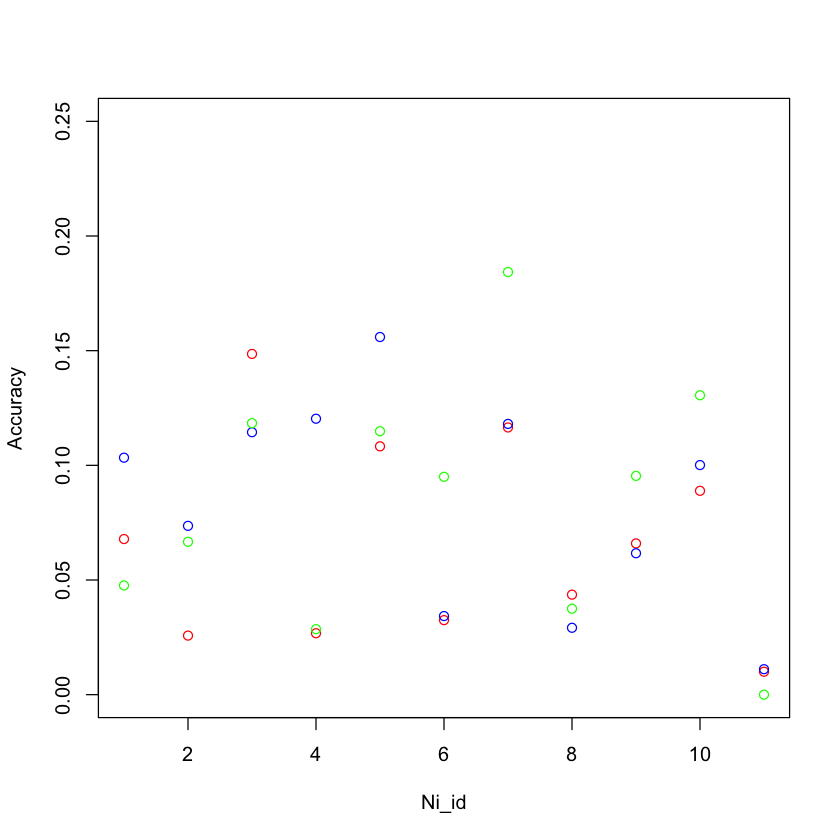

In [70]:
plot(Result_Jaccard, ylim=c(0, 0.25),xlab = "Ni_id", ylab = "Accuracy",col = 'red')
par(new=TRUE)
plot(Result_commom, ylim=c(0, 0.25), axes = FALSE,xlab = "", ylab = "",col = 'blue')
par(new=TRUE)
plot(Result_AA, ylim=c(0, 0.25), axes = FALSE,xlab = "", ylab = "",col = 'green')
